# EXPLORATORY DATA ANALYSIS ON A DATASET

## 🎯 Objective
The main goal of this assignment is to conduct a thorough exploratory analysis of the **"cardiographic.csv"** dataset to uncover insights, identify patterns, and understand the dataset's underlying structure. You will use statistical summaries, visualizations, and data manipulation techniques to explore the dataset comprehensively.

---
**📂 Dataset Description**
1. **LB** - Baseline Fetal Heart Rate (FHR): average fetal heart rate over a period.  
2. **AC** - Accelerations in the FHR, usually a sign of fetal well-being.  
3. **FM** - Fetal Movements detected by the monitor.  
4. **UC** - Uterine Contractions, which can impact the FHR pattern.  
5. **DL** - Decelerations Late, may indicate fetal distress.  
6. **DS** - Decelerations Short (brief duration).  
7. **DP** - Decelerations Prolonged (long-lasting).  
8. **ASTV** - % of Time with Abnormal Short Term Variability.  
9. **MSTV** - Mean Value of Short Term Variability.  
10. **ALTV** - % of Time with Abnormal Long Term Variability.  
11. **MLTV** - Mean Value of Long Term Variability.
---
**🛠️ Tools and Libraries**
- Python programming language  
- **Pandas, NumPy** → Data manipulation  
- **Matplotlib, Seaborn** → Data visualization  
- Jupyter Notebook → Documentation and analysis  


## 1. Data Cleaning and Preparation
- **Load the dataset** into a data frame or equivalent data structure.  
- **Handle missing values** appropriately (e.g., imputation, deletion).  
- **Identify and correct inconsistencies** in data types (e.g., numerical values stored as strings).  
- **Detect and treat outliers** if necessary.

In [1]:
# Importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

In [21]:
# 1. Load the dataset
df = pd.read_csv('Cardiotocographic.csv')
print("Shape:", df.shape)  # To get number of rows and column 
display(df.head())

Shape: (2126, 14)


,LB,AC,FM,UC,DL,DS,DP,ASTV,MSTV,ALTV,MLTV,Width,Tendency,NSP
0,120.000000,0.000000,0.0,0.000000,0.000000,0.0,0.0,73.0,0.5,43.0,2.4,64.0,0.999926,2.0
1,132.000000,0.006380,0.0,0.006380,0.003190,0.0,0.0,17.0,2.1,0.0,10.4,130.0,0.000000,1.0
2,133.000000,0.003322,0.0,0.008306,0.003322,0.0,0.0,16.0,2.1,0.0,13.4,130.0,0.000000,1.0
3,134.000000,0.002561,0.0,0.007742,0.002561,0.0,0.0,16.0,2.4,0.0,23.0,117.0,1.000000,1.0
4,131.948232,0.006515,0.0,0.008143,0.000000,0.0,0.0,16.0,2.4,0.0,19.9,117.0,1.000000,1.0


In [22]:
# 1.1 Quick info and types
df.info()
display(df.describe(include='all').T)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2126 entries, 0 to 2125
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   LB        2105 non-null   float64
 1   AC        2106 non-null   float64
 2   FM        2126 non-null   float64
 3   UC        2126 non-null   float64
 4   DL        2126 non-null   float64
 5   DS        2105 non-null   float64
 6   DP        2105 non-null   float64
 7   ASTV      2126 non-null   float64
 8   MSTV      2126 non-null   float64
 9   ALTV      2126 non-null   float64
 10  MLTV      2105 non-null   float64
 11  Width     2105 non-null   float64
 12  Tendency  2105 non-null   float64
 13  NSP       2105 non-null   float64
dtypes: float64(14)
memory usage: 232.7 KB


,count,mean,std,min,25%,50%,75%,max
LB,2105.0,133.343598,11.270154,51.842487,126.000000,133.000000,140.000000,214.000000
AC,2106.0,0.003219,0.004391,-0.019284,0.000000,0.001634,0.005650,0.038567
FM,2126.0,0.009894,0.067540,-0.480634,0.000000,0.000000,0.002567,0.961268
UC,2126.0,0.004391,0.003340,-0.014925,0.001851,0.004484,0.006536,0.030002
DL,2126.0,0.001895,0.003343,-0.015393,0.000000,0.000000,0.003289,0.030769
DS,2105.0,0.000003,0.000142,-0.001353,0.000000,0.000000,0.000000,0.002706
DP,2105.0,0.000175,0.000840,-0.005348,0.000000,0.000000,0.000000,0.010695
ASTV,2126.0,46.995984,18.813973,-63.000000,32.000000,49.000000,61.000000,162.000000
MSTV,2126.0,1.364378,1.173632,-6.600000,0.700000,1.200000,1.700000,13.800000
ALTV,2126.0,10.285964,21.205041,-91.000000,0.000000,0.000000,11.000000,182.000000


In [23]:
# 1.2 Standardize column names (strip whitespace, lowercase)
df.columns = [c.strip() for c in df.columns] # To remove Extra spaces like (' LB ' → 'LB')
df.columns = [c.replace(' ', '_') for c in df.columns]
df.columns = [c.upper() for c in df.columns]  # Optional: making uppercase for consistency
df.head()

,LB,AC,FM,UC,DL,DS,DP,ASTV,MSTV,ALTV,MLTV,WIDTH,TENDENCY,NSP
0,120.000000,0.000000,0.0,0.000000,0.000000,0.0,0.0,73.0,0.5,43.0,2.4,64.0,0.999926,2.0
1,132.000000,0.006380,0.0,0.006380,0.003190,0.0,0.0,17.0,2.1,0.0,10.4,130.0,0.000000,1.0
2,133.000000,0.003322,0.0,0.008306,0.003322,0.0,0.0,16.0,2.1,0.0,13.4,130.0,0.000000,1.0
3,134.000000,0.002561,0.0,0.007742,0.002561,0.0,0.0,16.0,2.4,0.0,23.0,117.0,1.000000,1.0
4,131.948232,0.006515,0.0,0.008143,0.000000,0.0,0.0,16.0,2.4,0.0,19.9,117.0,1.000000,1.0


In [24]:
# 1.3 Missing values: check counts and percentage
missing_count = df.isna().sum()
missing_pct = 100 * missing_count / len(df)
missing_summary = pd.concat([missing_count, missing_pct], axis=1)
missing_summary.columns = ['Missing_Count', 'Missing_Percentage']
display(missing_summary.sort_values('Missing_Count', ascending=False))

,Missing_Count,Missing_Percentage
LB,21,0.987770
DS,21,0.987770
DP,21,0.987770
MLTV,21,0.987770
WIDTH,21,0.987770
TENDENCY,21,0.987770
NSP,21,0.987770
AC,20,0.940734
FM,0,0.000000
UC,0,0.000000


In [25]:
# 1.4 Handling missing values (strategies):
# - If a column has many missing values (>30%), consider dropping it or investigating.
# - For numeric features: impute with mean/median or use KNN/imputer (demonstrated with median).
# - For a small number of rows with missing values: drop rows.
numeric_cols = df.select_dtypes(include=[np.number]).columns.tolist()
for col in numeric_cols:
    if df[col].isna().sum() > 0:
        df[col].fillna(df[col].median(), inplace=True)

# Example: if any non-numeric categorical columns have NaNs, fill with 'Unknown'
#cat_cols = df.select_dtypes(include=['object', 'category']).columns.tolist()
#for col in cat_cols:
#    df[col].fillna('Unknown', inplace=True)

C:\Users\Kaustubh Jadhav\AppData\Local\Temp\ipykernel_21452\600033521.py:8: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].median(), inplace=True)


In [26]:
# 1.5 Convert types if needed (e.g., numeric stored as strings)
# Attempt to coerce non-numeric columns to numeric where appropriate
for col in df.columns:
    if df[col].dtype == object:
        coerced = pd.to_numeric(df[col], errors='coerce')
        non_na_ratio = coerced.notna().sum() / len(coerced)
        # If large fraction converts to numeric, replace column
        if non_na_ratio > 0.5:
            df[col] = coercedC

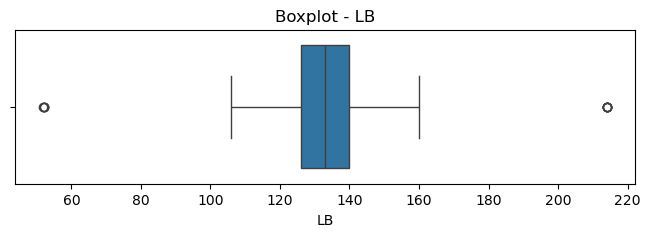

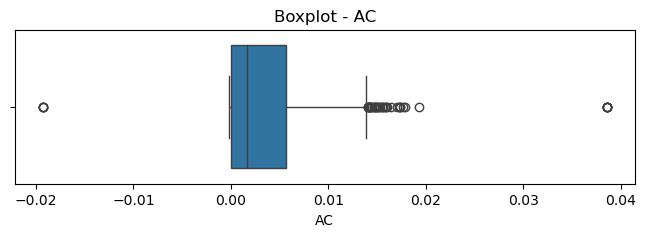

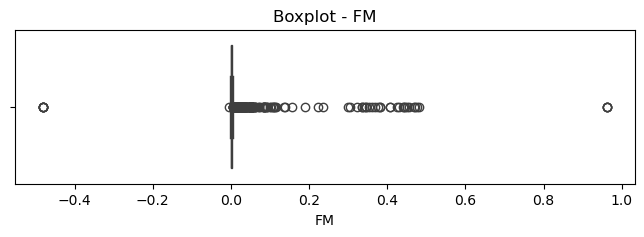

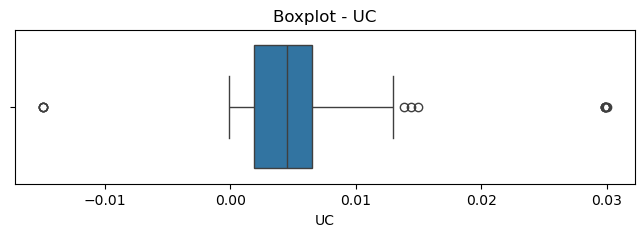

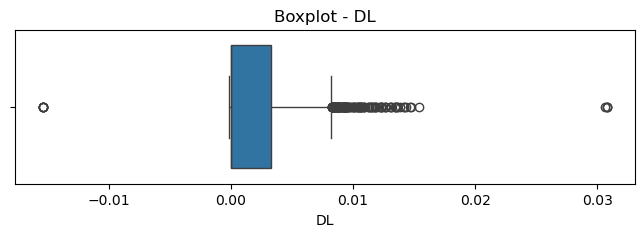

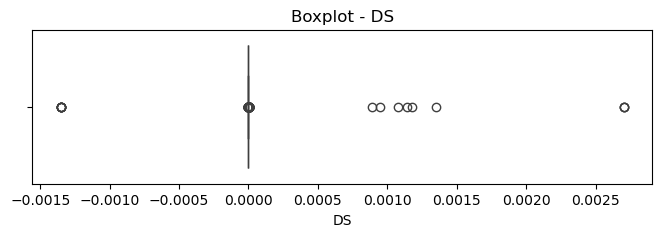

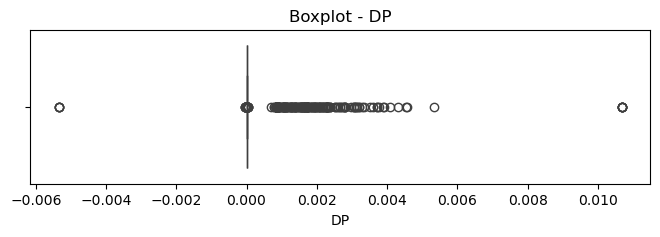

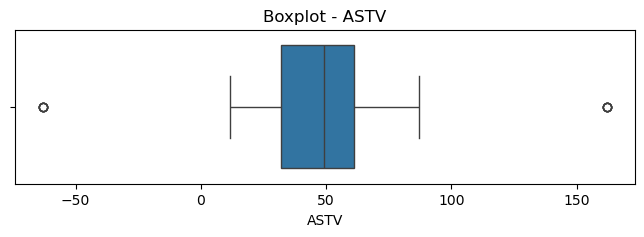

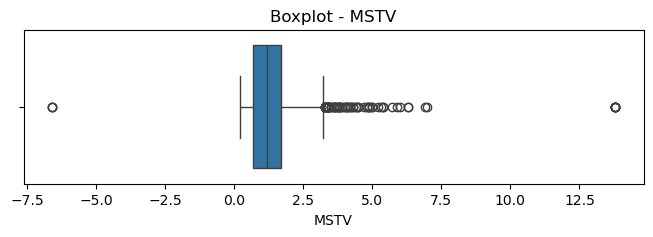

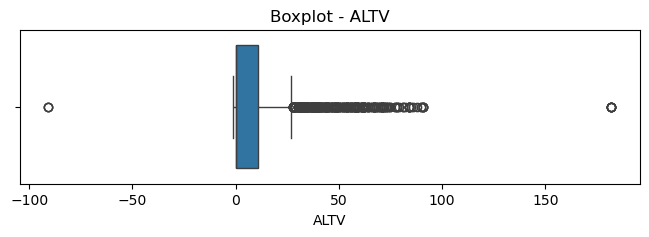

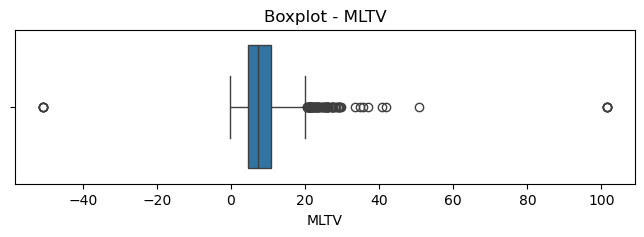

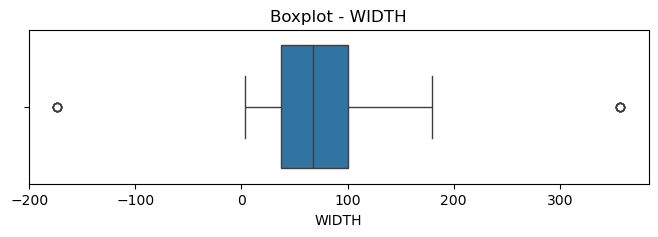

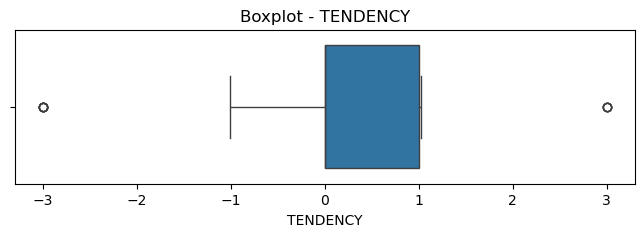

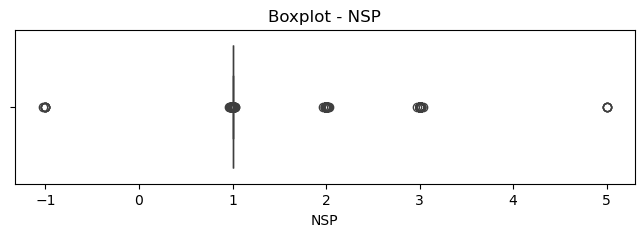

In [27]:
# 1.6 Outlier detection (visual and z-score based)
# Display boxplots for numeric columns
num_cols = df.select_dtypes(include=[np.number]).columns.tolist()
for col in num_cols:
    plt.figure(figsize=(8, 2))
    sns.boxplot(x=df[col])
    plt.title(f'Boxplot - {col}')
    plt.show()

In [28]:
# Z-score method to flag extreme outliers (|z| > 3)
z_scores = np.abs(stats.zscore(df[num_cols], nan_policy='omit'))
outlier_mask = (z_scores > 3)
# Count outliers per column:
outlier_counts = pd.DataFrame(outlier_mask, columns=num_cols).sum().sort_values(ascending=False)
display(outlier_counts)

FM          39
DP          39
ALTV        38
DL          33
MSTV        26
AC          18
MLTV        17
DS          16
UC          11
LB          10
ASTV        10
WIDTH       10
TENDENCY    10
NSP         10
dtype: int64

In [29]:
# Handling outliers by capping (winsorization) at 1st and 99th percentiles
def winsorize_series(s, lower_pct=0.01, upper_pct=0.99):
    lower = s.quantile(lower_pct)
    upper = s.quantile(upper_pct)
    return s.clip(lower, upper)

df_winsor = df.copy()
for col in num_cols:
    df_winsor[col] = winsorize_series(df_winsor[col], 0.01, 0.99)

## 2. Statistical Summary
- Provide a **Statistical Summary** for each variable in the dataset, including measures of central tendency (mean, median) and dispersion (standard deviation, interquartile range).
- Highlight any interesting findings from this summary. 

In [30]:
# 2.1 For each numeric column: mean, median, std, IQR, min, max
summary_stats = df[num_cols].agg(['count', 'mean', 'median', 'std', 'min', 'max', 'skew']).T
summary_stats['IQR'] = df[num_cols].apply(lambda x: x.quantile(0.75) - x.quantile(0.25))
display(summary_stats.sort_values('mean', ascending=False))

,count,mean,median,std,min,max,skew,IQR
LB,2126.0,133.340204,133.000000,11.214379,51.842487,214.000000,0.323245,14.000000
WIDTH,2126.0,70.395387,67.000000,42.720508,-174.000000,357.000000,0.500036,63.000000
ASTV,2126.0,46.995984,49.000000,18.813973,-63.000000,162.000000,0.055872,29.000000
ALTV,2126.0,10.285964,0.000000,21.205041,-91.000000,182.000000,2.981199,11.000000
MLTV,2126.0,8.276147,7.400000,7.734851,-50.700000,101.400000,3.561739,6.200000
MSTV,2126.0,1.364378,1.200000,1.173632,-6.600000,13.800000,4.142518,1.000000
NSP,2126.0,1.301499,1.000000,0.642133,-1.025988,5.000000,1.826906,0.000000
TENDENCY,2126.0,0.313246,0.000000,0.643186,-3.000000,3.000000,-0.484072,1.000000
FM,2126.0,0.009894,0.000000,0.067540,-0.480634,0.961268,6.753070,0.002567
UC,2126.0,0.004391,0.004484,0.003340,-0.014925,0.030002,0.974239,0.004685


## 3. Data Visualization
- **Histograms / Boxplots** → visualize distributions of numerical variables.  
- **Bar charts / Pie charts** → frequency of categories for categorical variables.  
- **Scatter plots / Correlation heatmaps** → explore relationships between variables.  
- **Advanced techniques**: Pair plots, Violin plots for deeper insights.

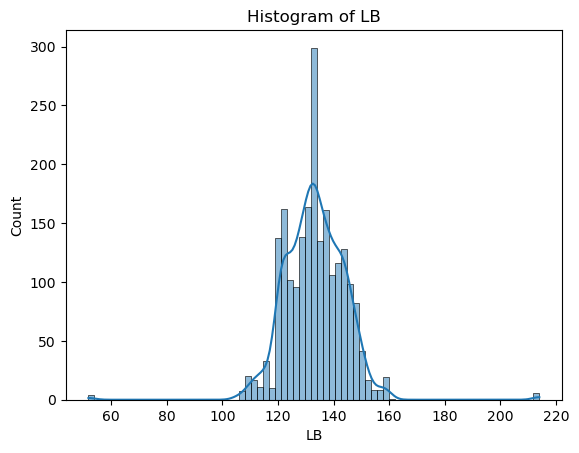

Skewness: 0.32301669231533625
Data is Positively Skewed


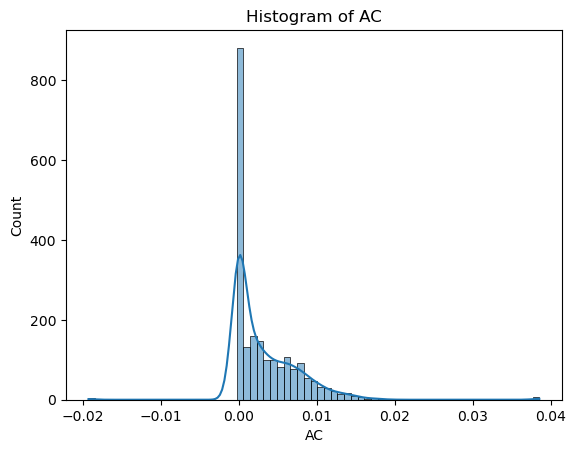

Skewness: 2.0309620360127223
Data is Positively Skewed


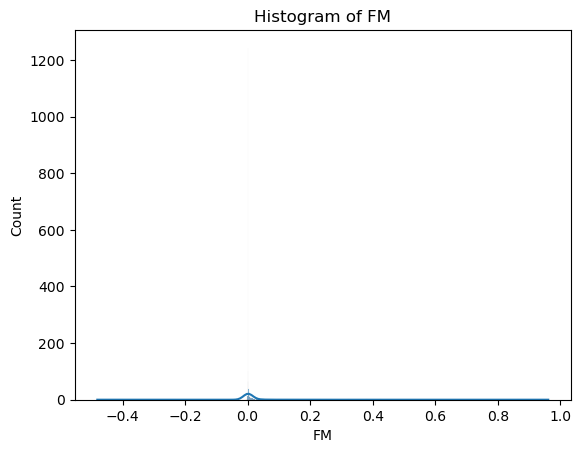

Skewness: 6.748304237254655
Data is Positively Skewed


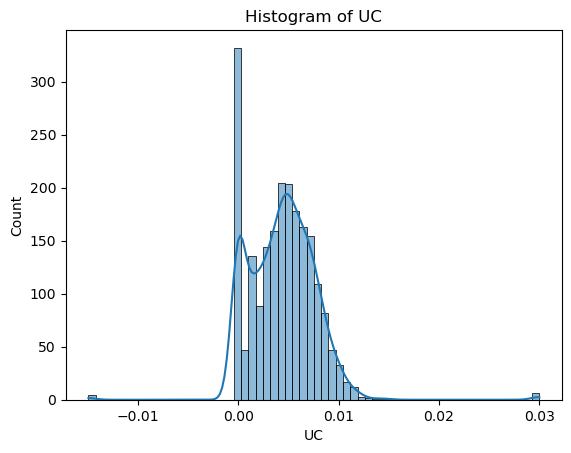

Skewness: 0.9735519413367377
Data is Positively Skewed


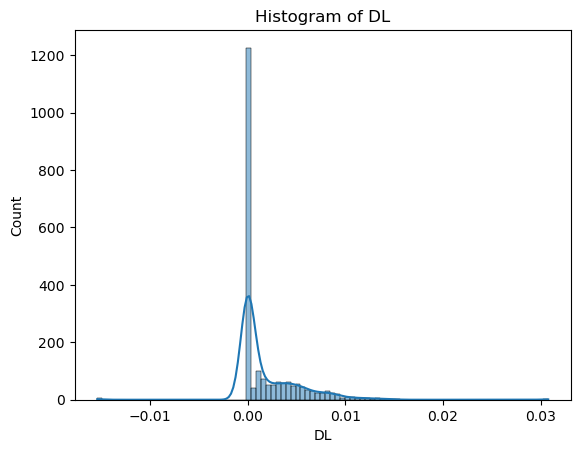

Skewness: 2.0089708258499273
Data is Positively Skewed


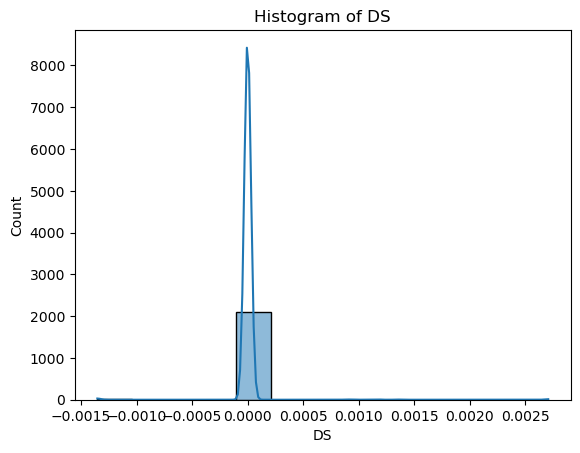

Skewness: 8.455333315545866
Data is Positively Skewed


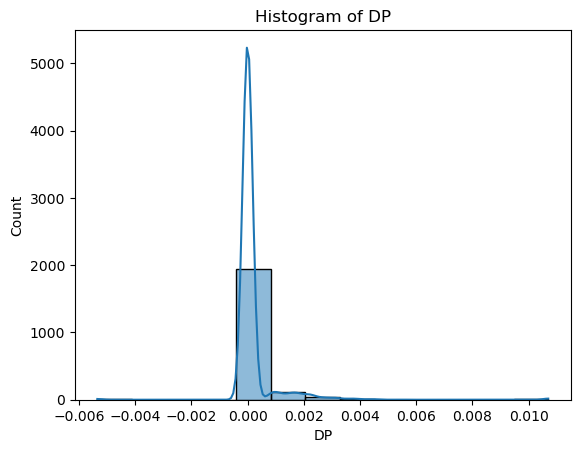

Skewness: 6.45178614375942
Data is Positively Skewed


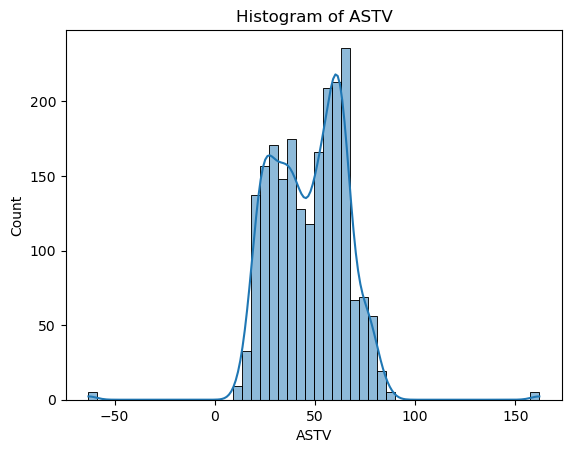

Skewness: 0.055832248726646154
Data is Positively Skewed


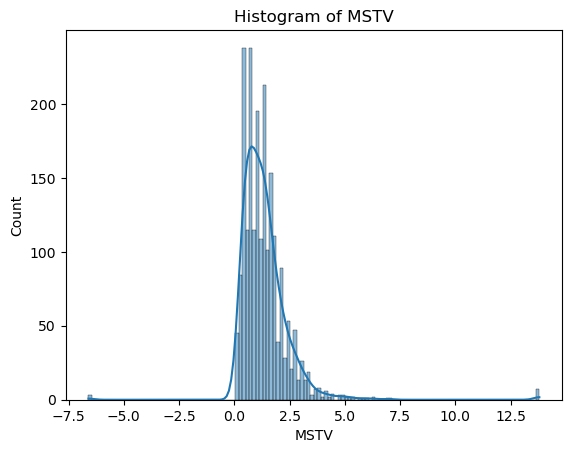

Skewness: 4.139594935496478
Data is Positively Skewed


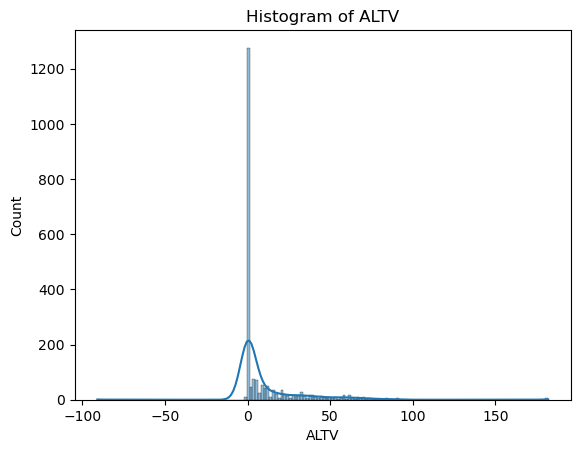

Skewness: 2.9790950010806565
Data is Positively Skewed


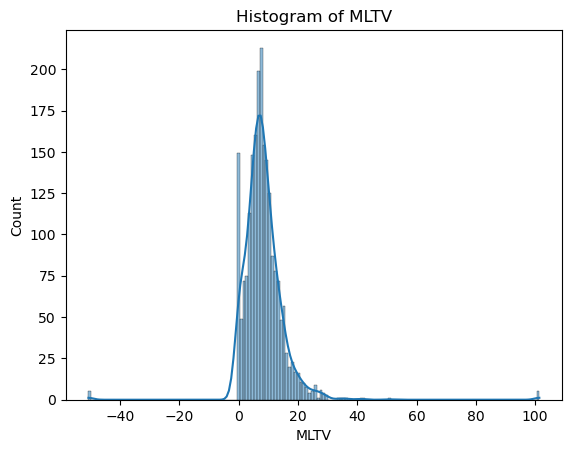

Skewness: 3.559225724466277
Data is Positively Skewed


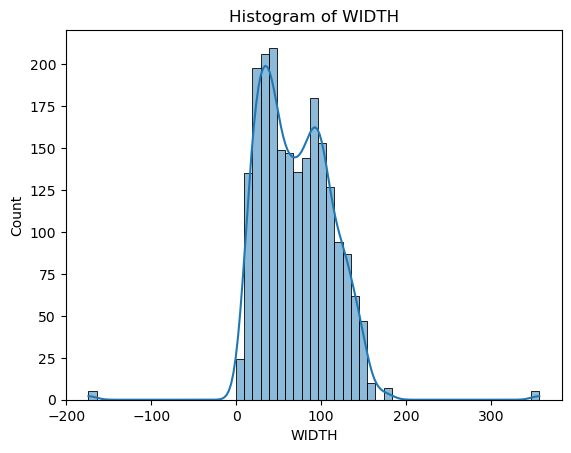

Skewness: 0.4996830226785741
Data is Positively Skewed


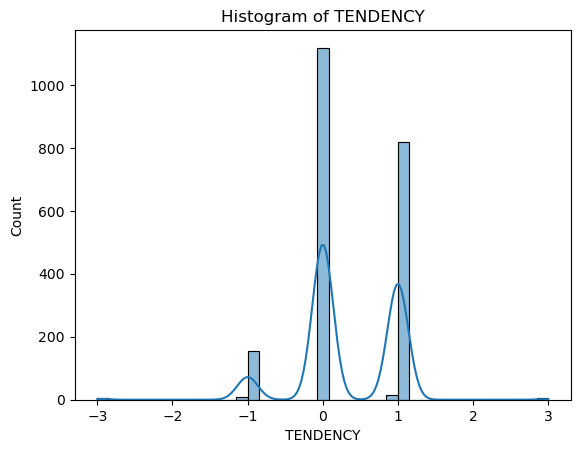

Skewness: -0.48373085663424936
Data is negatively Skewed


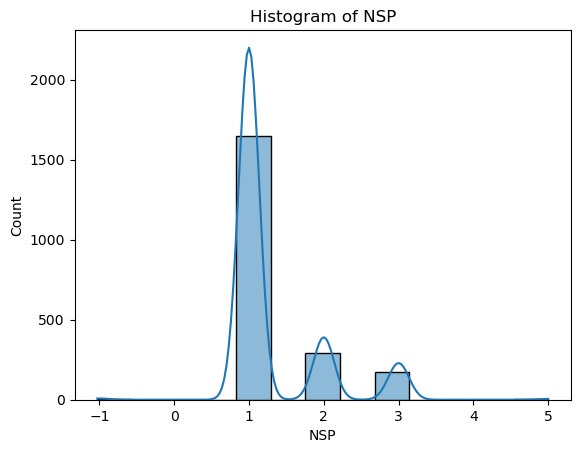

Skewness: 1.825616347408111
Data is Positively Skewed


In [31]:
# 3.1 Histograms for each numeric variable
from scipy import stats as st
for col in num_cols:
    plt.figure()
    sns.histplot(df[col], kde=True)
    plt.title(f'Histogram of {col}')
    plt.xlabel(col)
    plt.show()
    sk=st.skew(df[col])
    print("Skewness:",sk)
    if sk == 0:
        print("Data is Symmetric")
    else:
        if sk > 0:
            print("Data is Positively Skewed")
        else:
            print("Data is negatively Skewed")

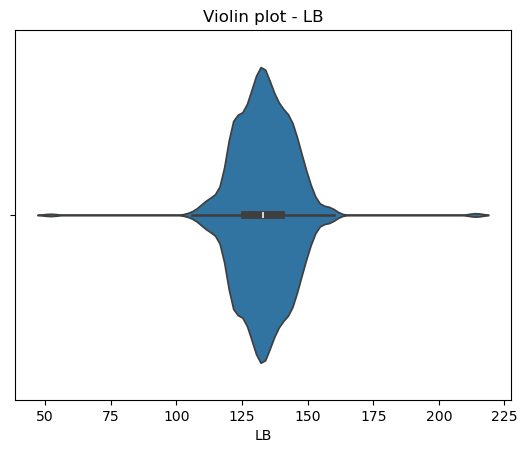

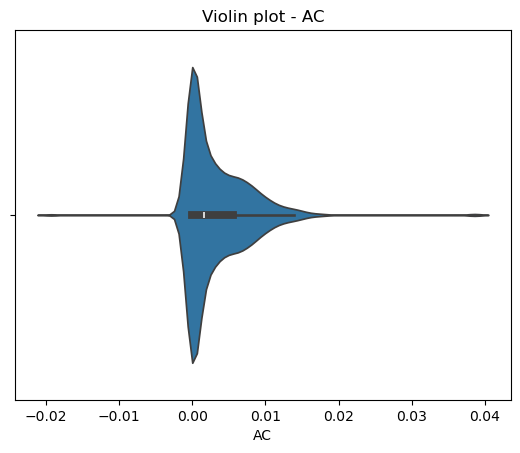

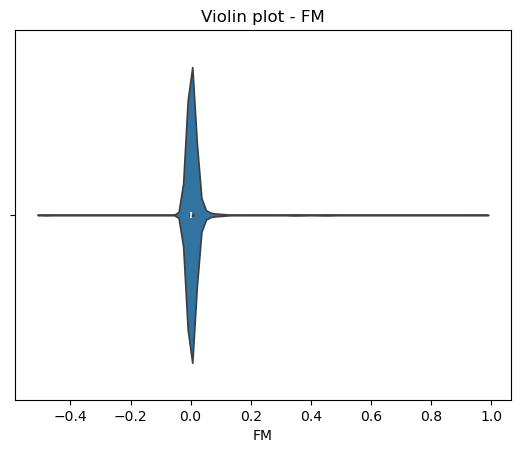

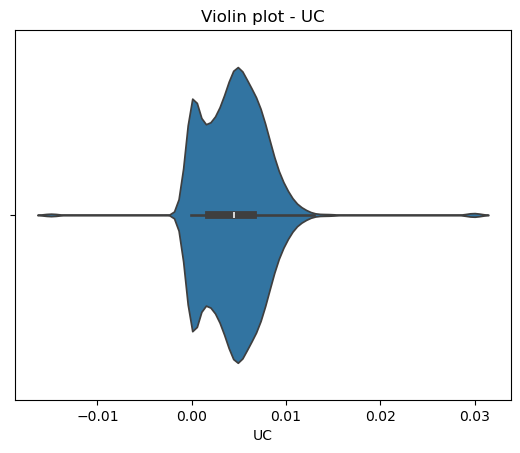

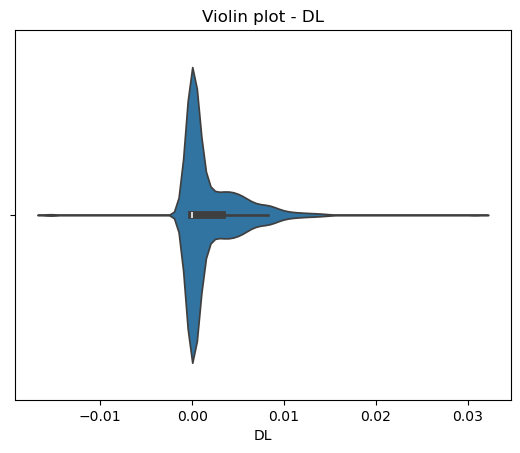

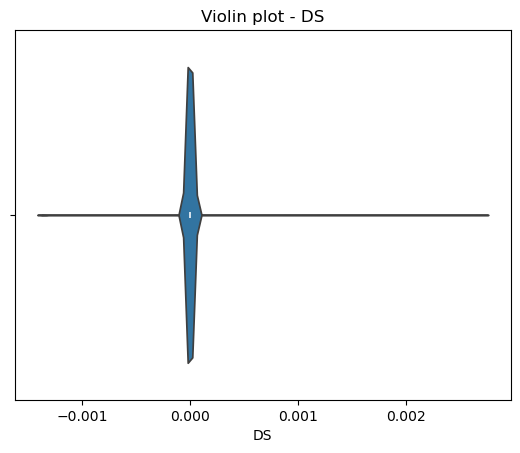

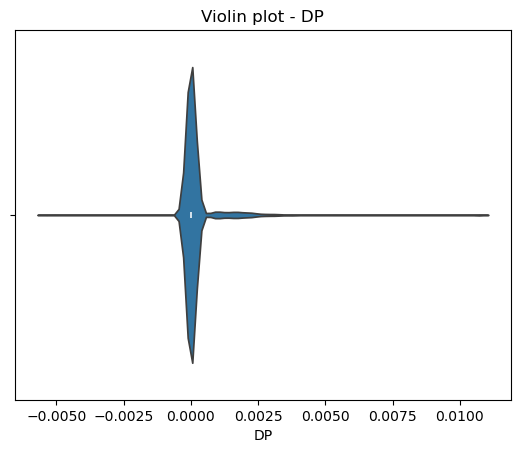

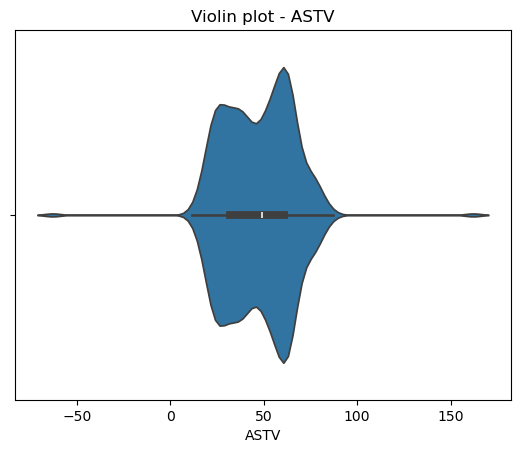

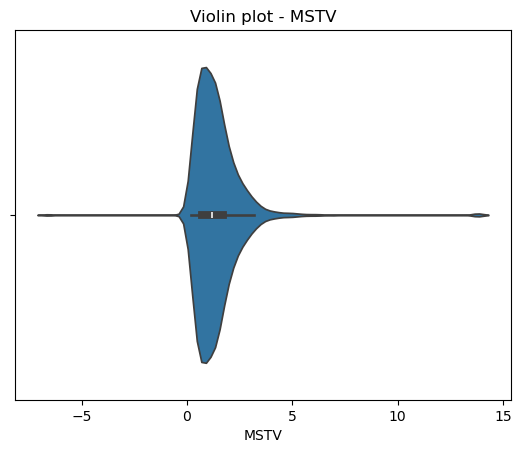

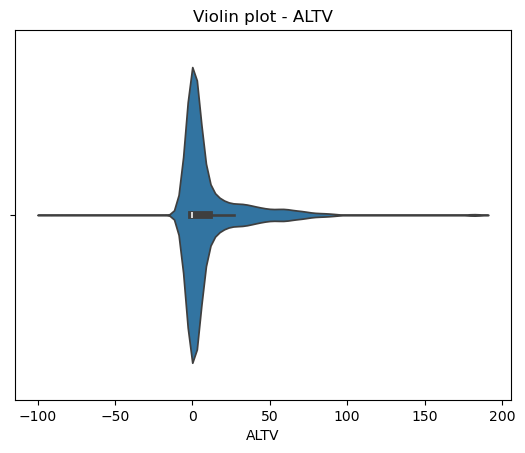

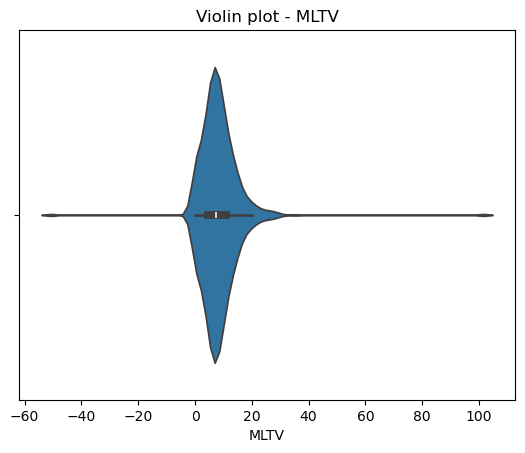

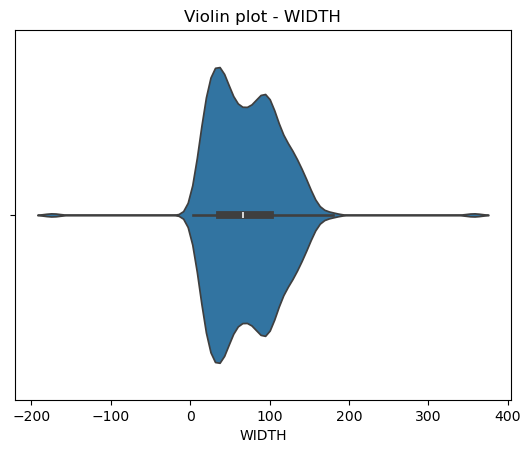

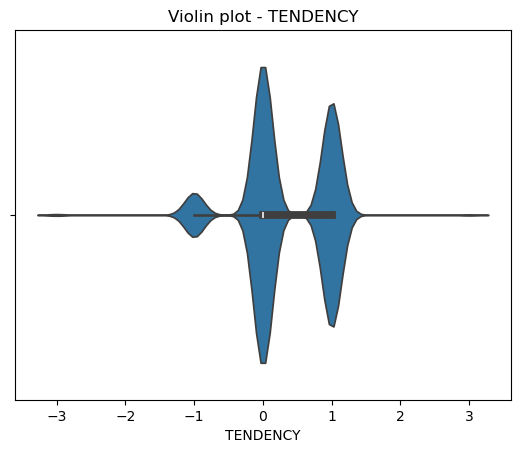

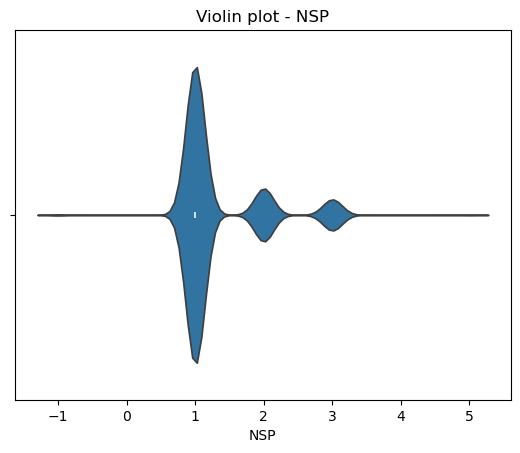

In [32]:
# 3.2 Violin plots to look at distribution shape
for col in num_cols:
    plt.figure()
    sns.violinplot(x=df[col])
    plt.title(f'Violin plot - {col}')
    plt.show()

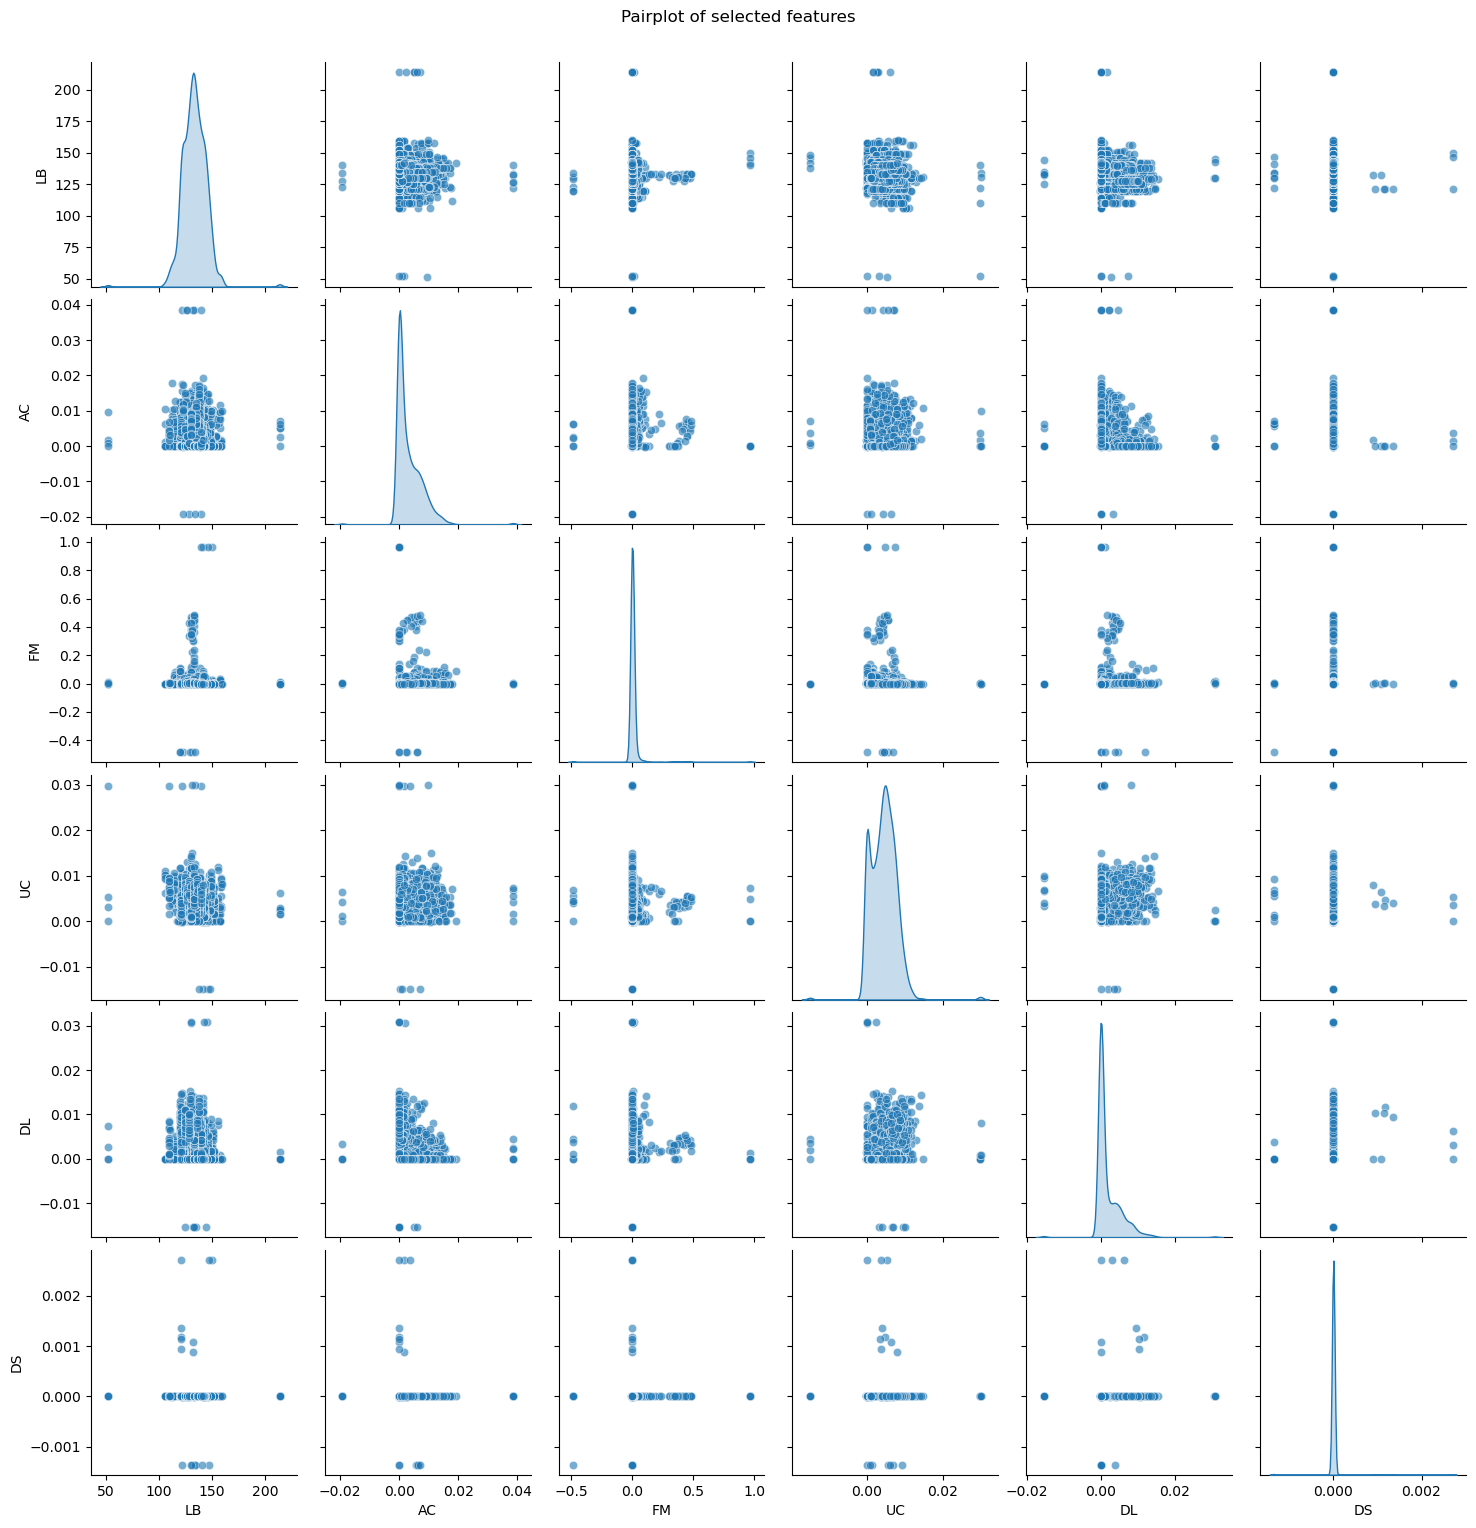

In [33]:
# 3.3 Pairplot for a subset of variables (if too many, pick important ones)
subset = num_cols[:6]   # adjust as needed
sns.pairplot(df[subset].dropna(), diag_kind='kde', plot_kws={'alpha':0.6})
plt.suptitle('Pairplot of selected features', y=1.02)
plt.show()

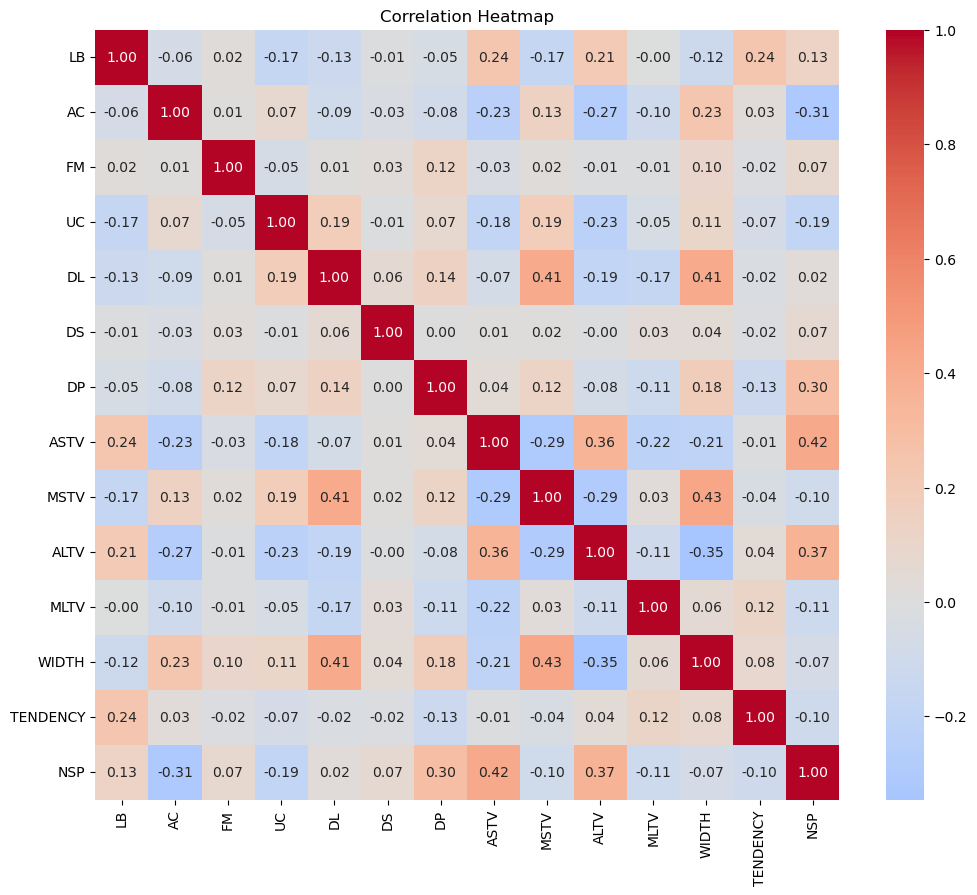

In [34]:
# 3.4 Correlation matrix + heatmap
corr = df[num_cols].corr()
plt.figure(figsize=(12, 10))
sns.heatmap(corr, annot=True, fmt=".2f", cmap='coolwarm', center=0)
plt.title('Correlation Heatmap')
plt.show()

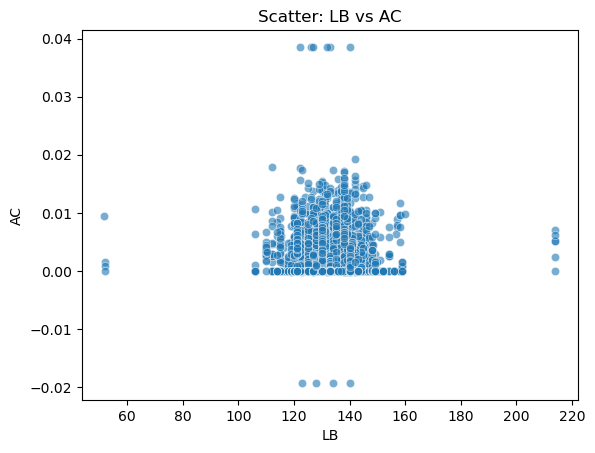

In [35]:
# 3.5 Scatter plot examples for interesting variable pairs
# Replace X and Y with columns showing notable correlation
if len(num_cols) >= 2:
    x_col, y_col = num_cols[0], num_cols[1]
    plt.figure()
    sns.scatterplot(x=df[x_col], y=df[y_col], alpha=0.6)
    plt.title(f'Scatter: {x_col} vs {y_col}')
    plt.xlabel(x_col)
    plt.ylabel(y_col)
    plt.show()

## 4. Pattern Recognition and Insights
- Identify correlations between variables and discuss implications.  
- Look for **trends or patterns** (over time if temporal data exists).  

In [36]:
# Show top correlation pairs (absolute)
corr_unstack = corr.abs().unstack()
corr_unstack = corr_unstack[corr_unstack < 1].sort_values(ascending=False).drop_duplicates()
display(corr_unstack.head(15))


WIDTH  MSTV        0.432822
NSP    ASTV        0.420873
MSTV   DL          0.410102
DL     WIDTH       0.408578
ALTV   NSP         0.366454
       ASTV        0.357497
       WIDTH       0.345732
NSP    AC          0.311689
       DP          0.295057
ASTV   MSTV        0.293882
MSTV   ALTV        0.291935
AC     ALTV        0.269807
ASTV   LB          0.241857
LB     TENDENCY    0.236730
AC     WIDTH       0.234549
dtype: float64

## 5. Conclusion
- Summarizing **key insights and patterns** from the analysis.

**Conclusions by Step 2:** 
Here we got to know that Mean (Average Value), Median (Meddle Value when we sort data in ascending or decending order), maximum and minimum value of respective data category), std i.e. Standard deviation of data variable, IQR which is interquartile range of data variable.
example:
1. MLTV has mean value 8.2761 its average value of Mean Value of Long Term Variability is 8.2761.
2. FM (Fetal Movements detected by the monitor) has maximum value is 0.96.
3. 46% of Time is mean of percent time with Abnormal Short Term Variability.
4. UC (Uterine Contractions, which can impact the FHR pattern) has median 0.004484 and mean 0.004391, so here we got to know that mean is less than median i.e data is negatively skewed i.e. median has more frequency than mean. 

**Conclusions by Step 3:**
1. In histogram, Many datasets has sharp curve i.e. leptokurtic ex. AC,  DL, DS, DP, ALTV and MLTV
2. We also got to know some di and trimodal data variables
   di-modal: UC, ASTV, WIDTH
   tri-modal: NSP, TENDENCY
3. Mesokurtic datasets : LB. US, ASTV, WIDTH

**Conclusions by Step 4:**
Here we get Correlation between the variable like which variables have more correlation. 
like, 
1. WIDTH and MSTV has 0.432822 i.e (Weak) Positive Correlation, which says if WIDTH increases then MSTV aslo little bit increases. 
2. DL (Decelerations Late, may indicate fetal distress) and MSTV (Mean Value of Short Term Variability) has correlation 0.410102 i.e. (Weak) Positive Correlation, so we say from it that if DL increases then MSTV also little bit increase Vice Versa.